##### Dataset

In [2]:
# banknotes.csv,
# location: https://mitu.co.in/dataset

##### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('datasets/banknotes.csv')

In [6]:
# input features
x = df.drop('Class', axis = 1)

# output labels
y = df['Class']

##### Cross Validation

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

##### Build the model

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf_rf = RandomForestClassifier(random_state=0, n_estimators=10)

In [55]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

##### Performance Evaluation

In [56]:
y_pred = clf_rf.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [58]:
print(confusion_matrix(y_test, y_pred))

[[193   2]
 [  0 148]]


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [60]:
accuracy_score(y_test, y_pred)

0.9941690962099126

In [61]:
clf_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

In [62]:
from sklearn.tree import plot_tree

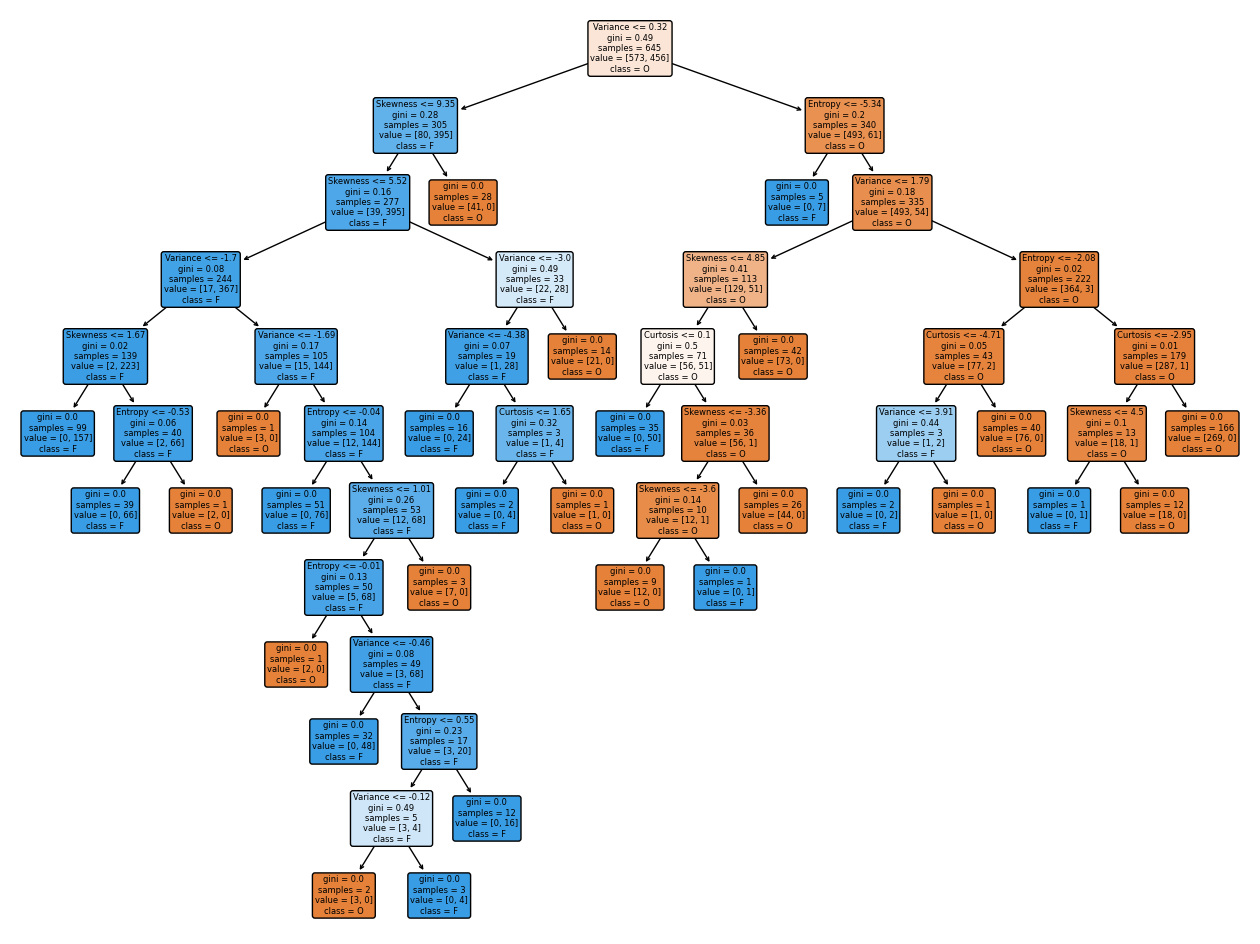

In [63]:
plt.figure(figsize=(16,12))
plot_tree(clf_rf.estimators_[3], fontsize=6, feature_names=x.columns,
         filled=True, precision=2, class_names=['O','F'],
         rounded=True);
plt.savefig('tree.png')

In [66]:
%%time
clf_rf.fit(x_train, y_train)

CPU times: user 90.4 ms, sys: 328 µs, total: 90.8 ms
Wall time: 88 ms


RandomForestClassifier(n_estimators=10, random_state=0)

In [67]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)

In [68]:
%%time
clf_tree.fit(x_train, y_train)

CPU times: user 18.1 ms, sys: 534 µs, total: 18.7 ms
Wall time: 17.7 ms


DecisionTreeClassifier(random_state=0)

In [69]:
import time

In [70]:
time.time()

1720681297.9799738

In [71]:
time.asctime()

'Thu Jul 11 12:34:26 2024'

##### Training Time

In [77]:
start = time.time()
clf_tree.fit(x_train, y_train)
end = time.time()
print('Decision Tree:', end - start)

start = time.time()
clf_rf.fit(x_train, y_train)
end = time.time()
print('Random Forest:', end - start)

Decision Tree: 0.015516519546508789
Random Forest: 0.07857370376586914


##### Prediction time

In [81]:
start = time.time()
clf_tree.predict(x_test)
end = time.time()
print('Decision Tree:', end - start)

start = time.time()
clf_rf.predict(x_test)
end = time.time()
print('Random Forest:', end - start)

Decision Tree: 0.006129026412963867
Random Forest: 0.008313179016113281
